# A 'pure credit' economy
The model below is an attempt to recreate in Python Steve Keen's 'pure credit' economy from chapter 14 in *Debunking economics*.

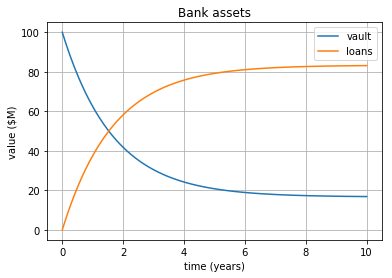

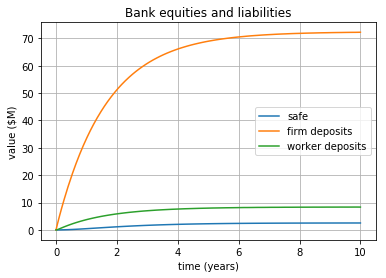

After 10 years, in $M:
vault = 16.9
safe = 2.5
firm deposits = 72.2
worker deposits = 8.3
loans = 83.1


In [2]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def bank_derivative(t, bank):
    vault = bank[0]
    safe = bank[1]
    firm_deposits = bank[2]
    worker_deposits = bank[3]
    loans = bank[4]

    # Rates of change (in year^(-1)), see Debunking economics for details
    lending_r = 0.5
    wages_r = 3.0
    banker_consumption_r = 1.0
    worker_consumption_r = 26.0
    repayment_r = 0.1
    loans_interest_r = 0.05
    deposits_interest_r = 0.02
    
    deposits = firm_deposits + worker_deposits
    consumption = worker_deposits * worker_consumption_r + safe * banker_consumption_r

    d_vault = loans * repayment_r - vault * lending_r
    d_safe = loans * loans_interest_r - deposits * deposits_interest_r - safe * banker_consumption_r
    d_firm_deposits = (-d_vault - loans * loans_interest_r - firm_deposits * wages_r + consumption +
                       firm_deposits * deposits_interest_r)
    d_worker_deposits = (firm_deposits * wages_r - worker_deposits * worker_consumption_r +
                         worker_deposits * deposits_interest_r)
    d_loans = -d_vault
    
    return [d_vault, d_safe, d_firm_deposits, d_worker_deposits, d_loans]

bank0 = [100.0, 0.0, 0.0, 0.0, 0.0]

sol = solve_ivp(bank_derivative, [0, 10], bank0, max_step = 1.0, dense_output=True)

plt.title('Bank assets')
plt.plot(sol.t, sol.y[0], label='vault')
plt.plot(sol.t, sol.y[4], label='loans')
plt.ylabel('value ($M)')
plt.xlabel('time (years)')
plt.legend()
plt.grid(True)
plt.show()
plt.close()

plt.title('Bank equities and liabilities')
plt.plot(sol.t, sol.y[1], label='safe')
plt.plot(sol.t, sol.y[2], label='firm deposits')
plt.plot(sol.t, sol.y[3], label='worker deposits')
plt.ylabel('value ($M)')
plt.xlabel('time (years)')
plt.legend()
plt.grid(True)
plt.show()
plt.close()

bank = sol.sol(10)

print('After 10 years, in $M:')
print('vault = %.1f' % bank[0])
print('safe = %.1f' % bank[1])
print('firm deposits = %.1f' % bank[2])
print('worker deposits = %.1f' % bank[3])
print('loans = %.1f' % bank[4])


# Comparison with Steve Keen's results
The plots and numbers above are almost exactly the same as those presented in *Debunking economics*, which I take as a proof that I correctly understood what Steve Keen meant, especially the bit about time constants.

He then calculates yearly wages, incomes and profits, based on the snapshot after 10 years. I have to admit that I am a little disturbed by the way he calculates profits, **assuming** that the workers' wages represent 75 percent of net income. Why not just calculate them? Surely, the numerical integration method works for those numbers too. In my opinion, one just has to add a few more accumulation variables in the model (wages, loan interests, etc.). This is what I do below. I rename 'bank' to 'economy', since this is a better fit with the new variables.

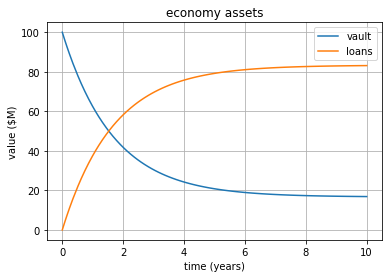

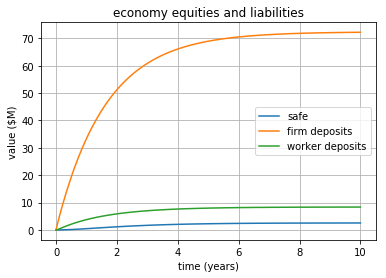

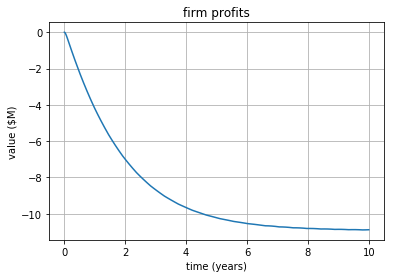

After 10 years, in $M:
vault = 16.9
safe = 2.5
firm deposits = 72.2
worker deposits = 8.3
loans = 83.1
firm profits = -10.9

During year 10, in $M:
wages = 216.6
loan interests = 4.2
worker deposits interests = 0.2
firm deposits interests = 1.4
firm costs = 220.711
firm revenue = 220.685
firm profit = -0.026
firm change in deposits = 0.143
change in loans = 0.170
part of wages in firm revenue = 98.13%


In [2]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def economy_derivative(t, economy):
    vault = economy[0]
    safe = economy[1]
    firm_deposits = economy[2]
    worker_deposits = economy[3]
    loans = economy[4]
    wages = economy[5]
    loan_interests = economy[6]
    worker_deposits_interests = economy[7]
    firm_deposits_interests = economy[8]
    firm_costs = economy[9]
    firm_revenue = economy[10]
    firm_profit = economy[11]

    # Rates of change (in year^(-1)), see Debunking economics for details
    lending_r = 0.5
    wages_r = 3.0
    banker_consumption_r = 1.0
    worker_consumption_r = 26.0
    repayment_r = 0.1
    loans_interest_r = 0.05
    deposits_interest_r = 0.02
    
    deposits = firm_deposits + worker_deposits
    consumption = worker_deposits * worker_consumption_r + safe * banker_consumption_r

    d_wages = firm_deposits * wages_r
    d_loan_interests = loans * loans_interest_r
    d_worker_deposits_interests = worker_deposits * deposits_interest_r
    d_firm_deposits_interests = firm_deposits * deposits_interest_r
    d_firm_costs = d_loan_interests + d_wages
    d_firm_revenue = consumption + d_firm_deposits_interests
    d_firm_profit = d_firm_revenue - d_firm_costs

    d_vault = loans * repayment_r - vault * lending_r
    d_safe = loans * loans_interest_r - deposits * deposits_interest_r - safe * banker_consumption_r
    d_firm_deposits =  d_firm_revenue - d_firm_costs - d_vault 
    d_worker_deposits = d_wages - worker_deposits * worker_consumption_r + d_worker_deposits_interests
    d_loans = -d_vault
    
    return [d_vault, d_safe, d_firm_deposits, d_worker_deposits, d_loans, d_wages, d_loan_interests,
            d_worker_deposits_interests, d_firm_deposits_interests, d_firm_costs, d_firm_revenue,
            d_firm_profit]

economy0 = [100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

sol = solve_ivp(economy_derivative, [0, 10], economy0, max_step = 1.0, dense_output=True)

plt.title('economy assets')
plt.plot(sol.t, sol.y[0], label='vault')
plt.plot(sol.t, sol.y[4], label='loans')
plt.ylabel('value ($M)')
plt.xlabel('time (years)')
plt.legend()
plt.grid(True)
plt.show()
plt.close()

plt.title('economy equities and liabilities')
plt.plot(sol.t, sol.y[1], label='safe')
plt.plot(sol.t, sol.y[2], label='firm deposits')
plt.plot(sol.t, sol.y[3], label='worker deposits')
plt.ylabel('value ($M)')
plt.xlabel('time (years)')
plt.legend()
plt.grid(True)
plt.show()
plt.close()

plt.title('firm profits')
plt.plot(sol.t, sol.y[11])
plt.ylabel('value ($M)')
plt.xlabel('time (years)')
plt.grid(True)
plt.show()
plt.close()

economy = sol.sol(10)

print('After 10 years, in $M:')
print('vault = %.1f' % economy[0])
print('safe = %.1f' % economy[1])
print('firm deposits = %.1f' % economy[2])
print('worker deposits = %.1f' % economy[3])
print('loans = %.1f' % economy[4])
print('firm profits = %.1f' % economy[11])
print()

income = economy - sol.sol(9)

print('During year 10, in $M:')
print('wages = %.1f' % income[5])
print('loan interests = %.1f' % income[6])
print('worker deposits interests = %.1f' % income[7])
print('firm deposits interests = %.1f' % income[8])
print('firm costs = %.3f' % income[9])
print('firm revenue = %.3f' % income[10])
print('firm profit = %.3f' % income[11])
print('firm change in deposits = %.3f' % income[2])
print('change in loans = %.3f' % income[4])
print('part of wages in firm revenue = %.2f%%' % (100 * income[5] / income[10]))

Although I guess these results do not fundamentally change Steve Keen's later conclusions, I find them rather interesting, especially the fact that the firms actually **loose money**.

Based on the figures and numbers above, we can characterize this economy as follows:
- The part of wages in firm revenue is not 75% but 98%! But how could that be surprising, when the main flow of revenue for the firms is money from the firms to the workers and back to the firms? The only part of revenue to the firm that does not come from the wages of workers are the interests from the bank, that are tiny. In fact, I find that insight quite fascinating: how could the total profits of firms be positive in an economy where the firms' goods and services are bought on the wages paid by the firms?
- At year ten (and above), the firms will make tiny losses every year, but their deposits will still continue to grow, because they borrow more and more, and what they borrow every year is higher that what they loose. None of this is dramatic, because all the aggregates are bounded by horizontal asymptotes. I.e. this could go on forever, without anybody going bankrupt.
- Although the firms make losses every year, this economy looks sustainable. I guess the capitalists will have to make a living as workers, on wages. Is that good or bad? Probably a question of taste...

Anyway, the learning from this model has been great so far, and I will without a doubt continue to explore Steve Keen's introduction of credit crunch and how to best come out of it.